In [1]:
import pandas as pd
import numpy as np

import scipy
# from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [2]:
# read CSV
df=pd.read_csv("unified_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
list(df)

['company_name',
 'status',
 'category_group_list',
 'num_funding_rounds',
 'total_funding_usd',
 'founded_on',
 'employee_count',
 'cat_commerce_shopping',
 'cat_fin_services',
 'cat_lending_invests',
 'cat_payments',
 'fd_rd_latest_investment',
 'fd_rd_investment_type_series_unknown',
 'fd_rd_investment_type_grant',
 'fd_rd_investment_type_debt_financing',
 'fd_rd_investment_type_pre_seed',
 'fd_rd_investment_type_post_ipo_equity',
 'fd_rd_investment_type_convertible_note',
 'fd_rd_investment_type_equity_crowdfunding',
 'fd_rd_investment_type_private_equity',
 'fd_rd_investment_type_undisclosed',
 'fd_rd_investment_type_post_ipo_debt',
 'fd_rd_investment_type_corporate_round',
 'fd_rd_investment_type_product_crowdfunding',
 'fd_rd_investment_type_non_equity_assistance',
 'fd_rd_investment_type_initial_coin_offering',
 'fd_rd_investment_type_secondary_market',
 'fd_rd_investment_type_post_ipo_secondary',
 'fd_rd_num_invested_by_top_100',
 'event_count',
 'job_duration',
 'gender_male'

In [4]:
keep_col = [
    # 'company_name',
    # 'status',
    # 'category_group_list',
    'num_funding_rounds',
    'total_funding_usd',
    'founded_on',
    'employee_count',
    'cat_commerce_shopping',
    'cat_fin_services',
    'cat_lending_invests',
    'cat_payments',
    'fd_rd_latest_investment',
    # 'fd_rd_investment_type_series_unknown',
    # 'fd_rd_investment_type_grant',
    # 'fd_rd_investment_type_debt_financing',
    # 'fd_rd_investment_type_pre_seed',
    # 'fd_rd_investment_type_post_ipo_equity',
    # 'fd_rd_investment_type_convertible_note',
    # 'fd_rd_investment_type_equity_crowdfunding',
    # 'fd_rd_investment_type_private_equity',
    # 'fd_rd_investment_type_undisclosed',
    # 'fd_rd_investment_type_post_ipo_debt',
    # 'fd_rd_investment_type_corporate_round',
    # 'fd_rd_investment_type_product_crowdfunding',
    # 'fd_rd_investment_type_non_equity_assistance',
    # 'fd_rd_investment_type_initial_coin_offering',
    # 'fd_rd_investment_type_secondary_market',
    # 'fd_rd_investment_type_post_ipo_secondary',
    'fd_rd_num_invested_by_top_100',
    'event_count',
    'job_duration',
    'gender_male',
    'gender_female',
    'degree_type',
    'subject_Business',
    'subject_STEM',
    'subject_Arts_SoSc',
    'num_exec',
    'first_fund_raised',
    'first_fund_post_money',
    'first_fund_investor_count',
    'has_parent',
    'continent_NA',
    'continent_EU',
    'continent_AS',
    'continent_SA',
    'continent_AF',
    'continent_OC',
    'country_code_USA',
    'country_code_GBR',
    'country_code_IND',
    'country_code_CHN',
    'country_code_CAN',
    # 'country_code_SGP',
    # 'country_code_AUS',
    # 'country_code_DEU',
    # 'country_code_BRA',
    # 'country_code_CHE',
    # 'country_code_ESP',
    # 'country_code_FRA',
    # 'country_code_NLD',
    # 'country_code_HKG',
    # 'country_code_ISR',
    # 'country_code_KOR',
    # 'country_code_SWE',
    # 'country_code_JPN',
    # 'country_code_MEX',
    # 'country_code_IDN',
    'city_London',
    'city_New York',
    'city_San Francisco',
    'city_Singapore',
    'city_Toronto',
    # 'city_Beijing',
    # 'city_Mumbai',
    # 'city_Los Angeles',
    # 'city_Chicago',
    # 'city_Sydney',
    # 'city_Paris',
    # 'city_São Paulo',
    # 'city_Tokyo',
    # 'city_Berlin',
    # 'city_Boston',
    # 'city_Stockholm',
    # 'city_Shanghai',
    # 'city_Tel Aviv',
    # 'city_Amsterdam',
    # 'city_Madrid',
    'status_operating',
    'status_exited',
    'status_closed',
    'has_acquisitions',
    'has_ipo',
    'average_change_in_funds',
    'average_momentum',
    'latest_momentum'
]

df = df[keep_col]

In [5]:
df.drop(columns='employee_count', inplace=True)

In [6]:
df.head()

,num_funding_rounds,total_funding_usd,founded_on,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,status_operating,status_exited,status_closed,has_acquisitions,has_ipo,average_change_in_funds,average_momentum,latest_momentum
0,3.0,4025000.0,4.0767,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.9945,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1.478261,2.964229,2.964229
1,5.0,13316538.0,8.7507,1.0,1.0,0.0,1.0,1.0,0.0,1.0,33.0767,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.557546,0.934681,0.331667
2,5.0,57011648.0,6.0795,0.0,1.0,0.0,0.0,3.0,2.0,0.0,52.3534,1.000000,0.000000,0.727273,0.545455,0.000000,0.000000,11.0,0.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.579845,0.825104,1.801594
3,10.0,3180350.0,4.7068,0.0,1.0,0.0,0.0,2.0,1.0,3.0,55.2630,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.515446,0.228600,0.228600
4,4.0,5700000.0,10.4164,1.0,0.0,0.0,0.0,2.0,0.0,0.0,59.6986,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.908425,0.341418,0.298739


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_funding_rounds             4050 non-null   float64
 1   total_funding_usd              4050 non-null   float64
 2   founded_on                     4050 non-null   float64
 3   cat_commerce_shopping          4050 non-null   float64
 4   cat_fin_services               4050 non-null   float64
 5   cat_lending_invests            4050 non-null   float64
 6   cat_payments                   4050 non-null   float64
 7   fd_rd_latest_investment        4050 non-null   float64
 8   fd_rd_num_invested_by_top_100  4050 non-null   float64
 9   event_count                    4050 non-null   float64
 10  job_duration                   4050 non-null   float64
 11  gender_male                    4050 non-null   float64
 12  gender_female                  4050 non-null   f

In [8]:
X = df.iloc[:, 0:38]
y = df.iloc[:, 44]

In [9]:
X_minmax = MinMaxScaler().fit_transform(X)

# ylabel= y.drop(columns=["has_acquisitions"])

binary_labels = [0,1]

# ylabel["average_change_in_funds"]= pd.qcut(ylabel["average_change_in_funds"], 2, labels = binary_labels)
# ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)
# ylabel["latest_momentum"]= pd.qcut(ylabel["latest_momentum"], 2, labels = binary_labels)
y = pd.qcut(y, 2, labels=binary_labels)

In [10]:
# corrmat = df.corr()
# plt.figure(figsize = (50, 50))
# sns.heatmap(df[corrmat.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# # sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
# plt.plot()

In [11]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs         Score
1               total_funding_usd  6.283866e+09
19          first_fund_post_money  2.893590e+08
18              first_fund_raised  2.763070e+07
20      first_fund_investor_count  5.807413e+02
10                   job_duration  1.182684e+02
2                      founded_on  7.800134e+01
8   fd_rd_num_invested_by_top_100  7.706177e+01
9                     event_count  2.049189e+01
7         fd_rd_latest_investment  1.397615e+01
35             city_San Francisco  8.194539e+00


[0.05711073 0.06986791 0.08401471 0.01939951 0.00978758 0.02250519
 0.02655545 0.04582367 0.02421859 0.03919078 0.06087461 0.03640121
 0.03611688 0.04708716 0.04232687 0.03860421 0.02584904 0.05363207
 0.07258282 0.02536886 0.06911044 0.00403393 0.00751997 0.00850263
 0.00681488 0.00538571 0.00439541 0.00417687 0.00860544 0.00497576
 0.00579817 0.00339804 0.00416717 0.00380045 0.00952296 0.00573261
 0.00432325 0.0024185 ]


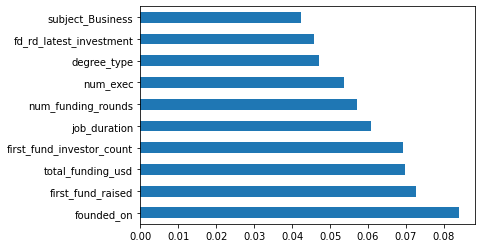

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_minmax,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

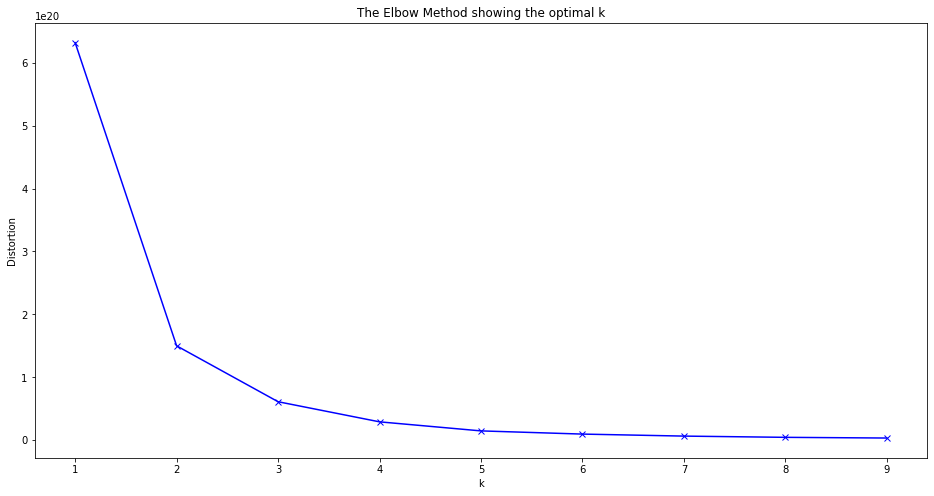

In [13]:
# elbow plot
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
# kmeans = KMeans(n_clusters=6).fit(x.astype(float))
# centroids = kmeans.cluster_centers_
# # centroids

# plt.scatter(df['any_partner'], df['mean_norm_amount_delta'], c = kmeans.labels_.astype(float), s = 40, alpha = 0.3)
# plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 30)
# plt.title("Clustered data")
# plt.xlabel("mean_norm_amount_delta")
# plt.ylabel("any_partner")
# plt.show()
# # This isn't a useful graph. Just put it here for later use